# Lab- Introduction to Prediction Models 
In this lab we will learn how to calcuate regression metrics by hand and compare their result to what we get from sklearn as well. 
This will be a good exercise in helping us understand how regression metrics are calucated.

So the order of things will be: 
1) Build a regression model for randomly generated data <br>
2) Calculate the following metrics by hand- MAE, MSE, $\text{R}^2$ <br> 
3) Calculate the same set of metrics using sklearn and compare 


In [52]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets, metrics


n_points = 10000
n_outliers = 50


x, y = datasets.make_regression(n_samples=n_points,
                                      n_features=1,
                                      n_informative=1,
                                      noise=2,
                                      random_state=0)


In [22]:
lr = linear_model.LinearRegression()
lr.fit(x,y)
predictions = lr.predict(x)
slope = lr.coef_
intercept = lr.intercept_

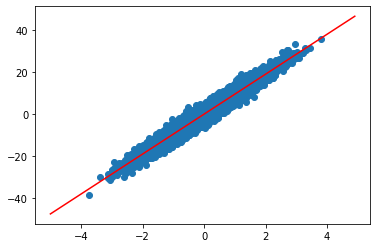

In [25]:
model_x = np.arange(-5,5,0.1 )
model_line = (slope*model_x) + intercept
plt.scatter(x,y)
plt.plot(model_x, model_line, c="red")
plt.show()

## Part 1: Manually Calcuating metrics


In [29]:
# MAE: Mean absolute error 

inside_term = np.abs(predictions-y)
MAE = np.mean(inside_term)
print("MAE value is {}".format(MAE))

MAE value is 1.5939893211912775


MAE value is 1.5939893211912775

In [31]:
# Mean squared error 

inside_term =  np.power((predictions-y), 2) 
MSE = np.mean(inside_term)
print("MSE value is {}".format(MSE))

MSE value is 4.005266767887255


MSE value is 4.005266767887255

In [47]:
# R^2 metric 

denominator = np.sum(np.power(predictions - np.mean(predictions),2))
numerator = np.sum(np.power(predictions-y,2))
R2 = 1 - (numerator/denominator)
print("R2  value is {}".format(R2))

R2  value is 0.954960377684678


R2  value is 0.954960377684678

# Part 2: Comparing with Sklearn's results


In [45]:
# MSE 
MAE_sk = metrics.mean_absolute_error(predictions, y)
print("MAE manual vs MAE using Sklearn- \nMAE manual: {} \nMAE sklearn: {}".format(MAE, MAE_sk))

MAE manual vs MAE using Sklearn- 
MAE manual: 1.5939893211912775 
MAE sklearn: 1.5939893211912775


MAE manual vs MAE using Sklearn-  <br>
MAE manual: 1.5939893211912775 <br>
MAE sklearn: 1.5939893211912775 <br>

In [46]:
# MSE 
MSE_sk = metrics.mean_squared_error(predictions, y)
print("MSE manual vs MSE using Sklearn- \nMSE manual: {} \nMSE sklearn: {}".format(MSE, MSE_sk))

MSE manual vs MSE using Sklearn- 
MSE manual: 4.005266767887255 
MSE sklearn: 4.005266767887255


In [49]:
# R2
R2_sk = metrics.r2_score(predictions, y)
print("R2 manual vs R2 using Sklearn- \nR2 manual: {} \nR2 sklearn: {}".format(R2, R2_sk))

R2 manual vs R2 using Sklearn- 
R2 manual: 0.954960377684678 
R2 sklearn: 0.954960377684678


# Part 3: Introducing error


In [55]:
displace_index = [10, 1000, 8888]
displacement = [30, -100, 50]
displaced_y = y.copy()
displaced_y[displace_index] = y[displace_index] + displacement


In [58]:
lr.fit(x, displaced_y)
displaced_preds = lr.predict(x)
displaced_slope = lr.coef_
displaced_intercept = lr.intercept_


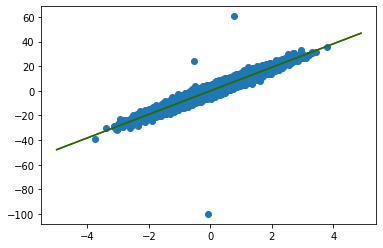

In [60]:
model_x = np.arange(-5,5,0.1 )
model_line = (slope*model_x) + intercept
displaced_model = (displaced_slope*model_x) +  displaced_intercept
plt.scatter(x,displaced_y)
plt.plot(model_x, model_line, c="red")
plt.plot(model_x, displaced_model, c="green")
plt.show()

In [62]:
dis_mae = metrics.mean_absolute_error(displaced_preds, y)

In [67]:
((dis_mae-MAE)/MAE)*100


0.0038914126313758643

In [71]:
dis_mse = metrics.mean_squared_error(displaced_preds, y)
((dis_mse-MSE)/MSE)*100


0.00035557901042923204

In [70]:
dis_R2 = metrics.r2_score(displaced_preds, y)
((dis_R2-R2)/R2)*100

0.0031827990213488468